In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
new_df = pd.read_csv('../Resources/Clean Data/combined_OvHo_df.csv')

new_df


,State,Overall Homeless,Year
0,AL,3304,2023
1,AR,2609,2023
2,AZ,14237,2023
3,CA,181399,2023
4,CO,14439,2023
...,...,...,...
811,VT,1035,2007
812,WA,23379,2007
813,WI,5648,2007
814,WV,2409,2007


In [4]:
new_df_with_dummies = pd.get_dummies(new_df, columns=['State'])

X = new_df_with_dummies.drop('Overall Homeless', axis=1)
y = new_df_with_dummies['Overall Homeless']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  
r_squared, rmse

c:\Users\scott_p9qjqkt\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(0.9466566510195004, 3653.5537060380557)

In [5]:
states = new_df['State'].unique()

new_years = np.arange(2024, 2029)
prediction_combinations = pd.DataFrame([(year, state) for year in new_years for state in states], columns=['Year', 'State'])

prediction_combinations_with_dummies = pd.get_dummies(prediction_combinations, columns=['State'])

missing_cols = set(X.columns) - set(prediction_combinations_with_dummies.columns)
for col in missing_cols:
    prediction_combinations_with_dummies[col] = 0
prediction_combinations_with_dummies = prediction_combinations_with_dummies[X.columns]

future_homeless_predictions = model.predict(prediction_combinations_with_dummies)

prediction_combinations['Predicted Overall Homeless'] = future_homeless_predictions

aggregate_predictions = prediction_combinations.groupby('Year')['Predicted Overall Homeless'].sum().reset_index()

aggregate_predictions

,Year,Predicted Overall Homeless
0,2024,516487.0
1,2025,511411.0
2,2026,506347.0
3,2027,501271.0
4,2028,496195.0


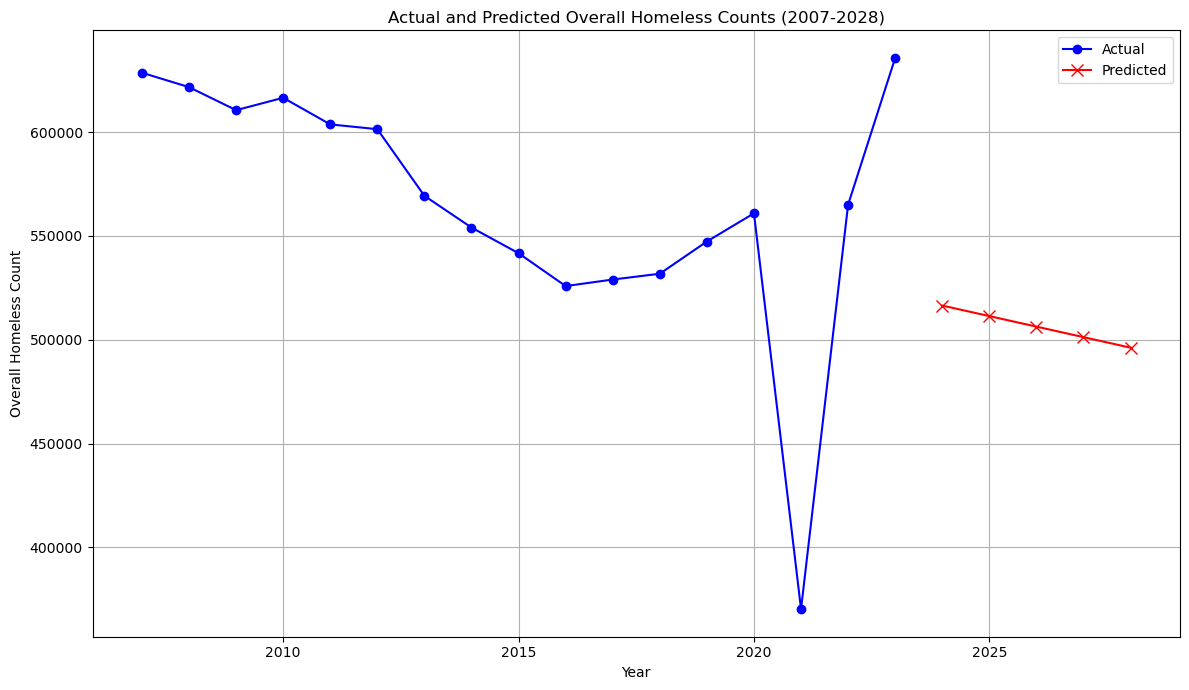

In [8]:
actual_yearly_totals_recreated = new_df.groupby('Year')['Overall Homeless'].sum().reset_index()

plt.figure(figsize=(12, 7))

plt.plot(actual_yearly_totals_recreated['Year'], actual_yearly_totals_recreated['Overall Homeless'], 'o-', color='blue', label='Actual')

plt.plot(aggregate_predictions['Year'], aggregate_predictions['Predicted Overall Homeless'], 'x-', color='red', label='Predicted', markersize=8)

plt.title('Actual and Predicted Overall Homeless Counts (2007-2028)')
plt.xlabel('Year')
plt.ylabel('Overall Homeless Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
